In [166]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [167]:
# Load the dataset
df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [168]:
# Total no.of rows and columns
df.shape

(101, 18)

In [169]:
# Check missing values
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [170]:
# Drop the 'animal name' column as it is not needed for classification
df = df.drop('animal name', axis=1)

In [171]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


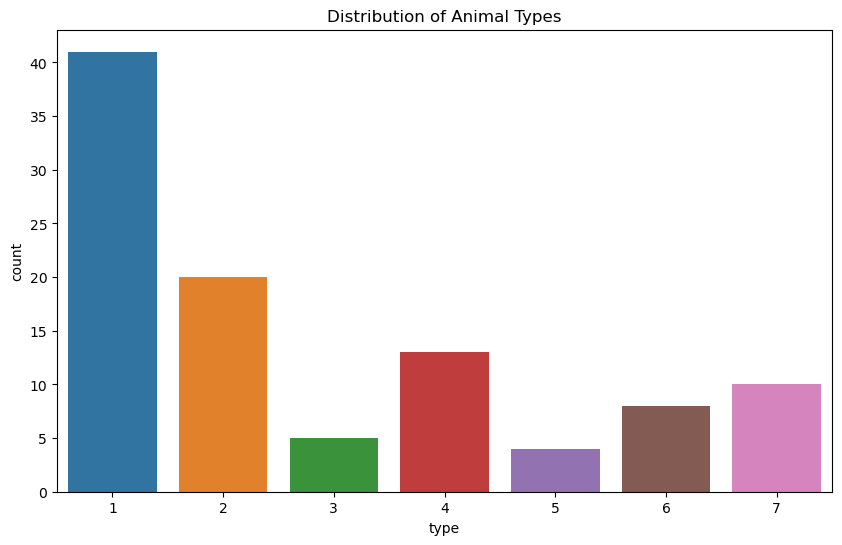

In [172]:
# Visualize the distribution of animal types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.show()

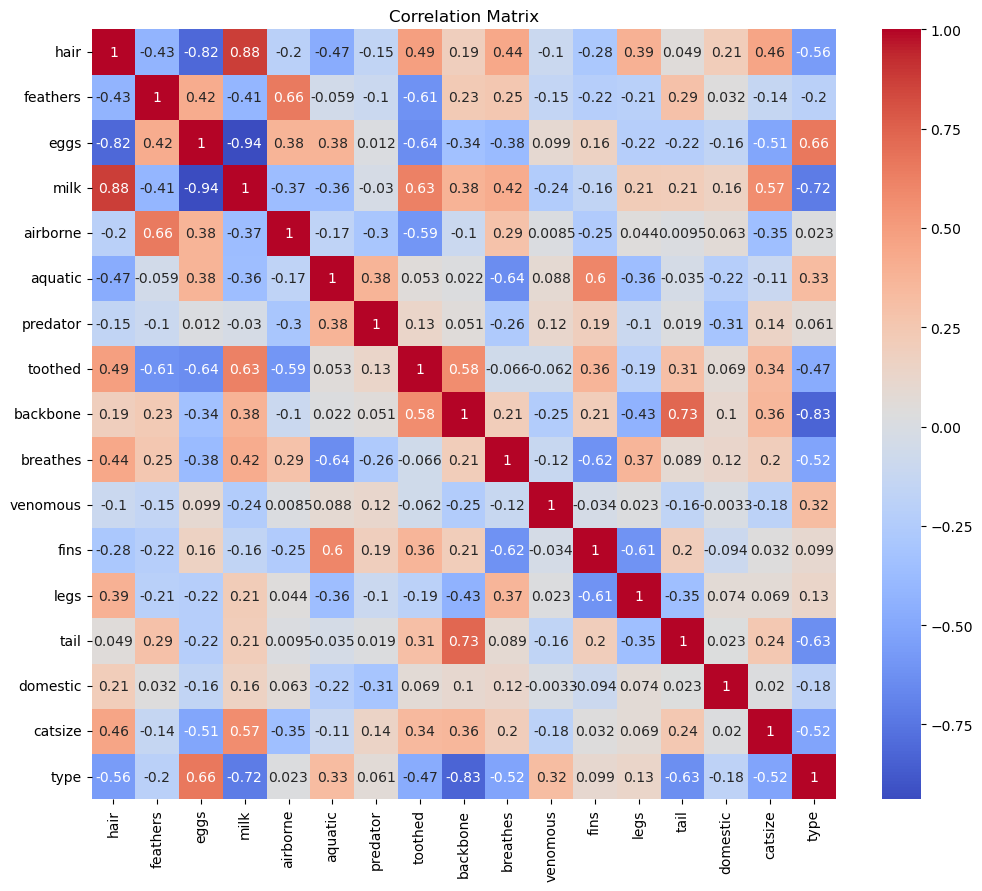

In [173]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [174]:
# Split the data into features and target variable
X = df.drop('type', axis=1)
y = df['type']

In [175]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [176]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [177]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [179]:
# Function to test different distance metrics and values of k
def test_knn_metrics(X_train, y_train, metrics, k_values):
    results = {}
    for metric in metrics:
        results[metric] = []
        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
            cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
            results[metric].append((k, np.mean(cv_scores)))
    return results

# Define the distance metrics and range of k values
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
k_values = range(1, 10)

# Test the metrics
results = test_knn_metrics(X_train, y_train, distance_metrics, k_values)

# Print the results
for metric in results:
    print(f"Results for {metric}:")
    for k, score in results[metric]:
        print(f"k={k}: Accuracy={score:.4f}")
    print()

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LENOVO\anaconda3

Results for euclidean:
k=1: Accuracy=0.9625
k=2: Accuracy=0.9375
k=3: Accuracy=0.8875
k=4: Accuracy=0.9250
k=5: Accuracy=0.9375
k=6: Accuracy=0.9000
k=7: Accuracy=0.8750
k=8: Accuracy=0.8625
k=9: Accuracy=0.8375

Results for manhattan:
k=1: Accuracy=0.9625
k=2: Accuracy=0.9375
k=3: Accuracy=0.9000
k=4: Accuracy=0.9250
k=5: Accuracy=0.9500
k=6: Accuracy=0.9500
k=7: Accuracy=0.9125
k=8: Accuracy=0.9125
k=9: Accuracy=0.8625

Results for chebyshev:
k=1: Accuracy=0.9125
k=2: Accuracy=0.9000
k=3: Accuracy=0.8625
k=4: Accuracy=0.7875
k=5: Accuracy=0.7625
k=6: Accuracy=0.7250
k=7: Accuracy=0.7750
k=8: Accuracy=0.7125
k=9: Accuracy=0.6750



In [180]:
# Choose the best parameters based on the results
best_metric = 'euclidean'  # Replace with the best metric found
best_k = 5  # Replace with the best k found

In [181]:
# Reduce the feature space to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [182]:
# Train the KNN classifier on the reduced feature space
knn_pca = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='euclidean')

In [183]:
# Predict the test set results
y_pred = knn_pca.predict(X_test_pca)

In [184]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(cr)
print('Accuracy Score:', accuracy)

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  2  0  0  1  0]
 [ 0  0  0  0  0  1]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.50      1.00      0.67         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         1

    accuracy                           0.86        21
   macro avg       0.69      0.72      0.66        21
weighted avg       0.87      0.86      0.83        21

Accuracy Score: 0.8571428571428571


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


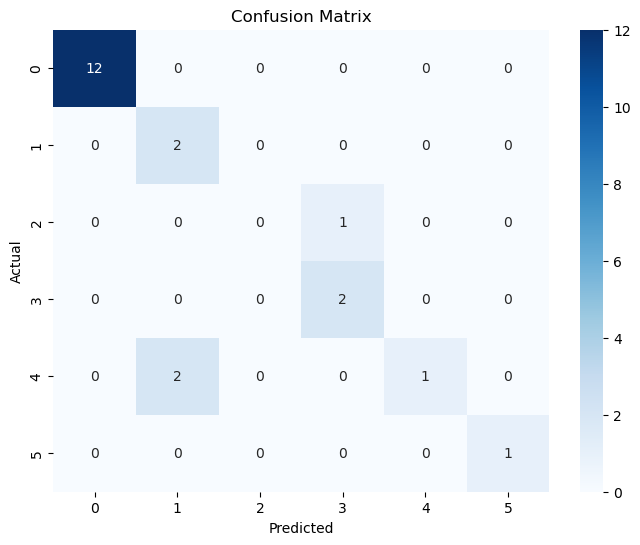

In [185]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

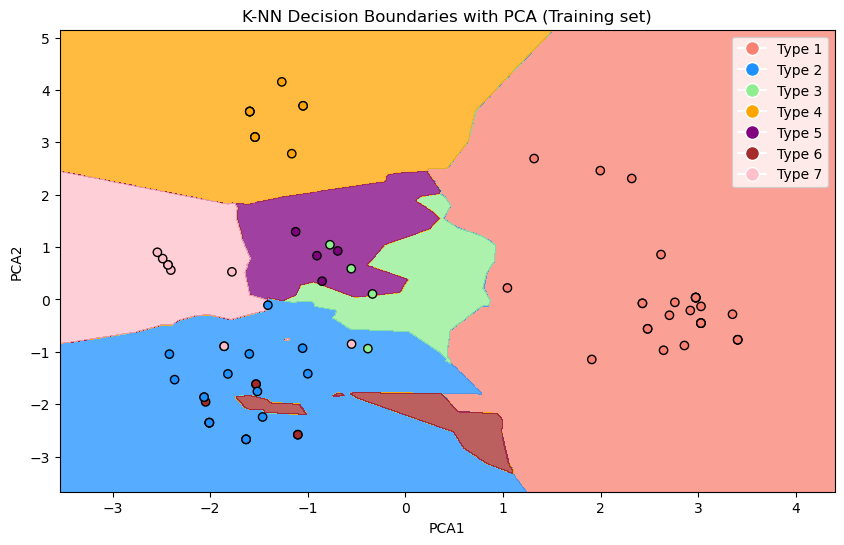

In [186]:
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the classification for each point in the mesh grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue', 'lightgreen', 'orange', 'purple', 'brown', 'pink')))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(('salmon', 'dodgerblue', 'lightgreen', 'orange', 'purple', 'brown', 'pink')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Adding labels and title
plt.title('K-NN Decision Boundaries with PCA (Training set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Create legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Type {i+1}')
                  for i, color in enumerate(['salmon', 'dodgerblue', 'lightgreen', 'orange', 'purple', 'brown', 'pink'])]
plt.legend(handles=legend_handles)
plt.show()